In [1]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 4.3 MB/s 
     |████████████████████████████████| 957 kB 37.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [2]:
import requests as rq
import pandas as pd
import time
import os
import pprint
import json as js

from google.colab import drive
drive.mount('/content/gdrive')

from google.colab import auth
import gspread
from google.auth import default

Mounted at /content/gdrive


In [12]:
root_path = '/content/gdrive/MyDrive/Colab Notebooks/Final_data/test'
folders = os.listdir(root_path)

catergories = []
sample_size = []
dataset_dict = dict()
pick_imgs = list()
for folder in folders:
  files = os.listdir(os.path.join(root_path, folder))
  qty = len(files)
  dataset_dict[folder] = qty
  catergories.append(folder.replace("_", " "))
  sample_size.append(qty)
  
  pick_one_img = os.path.join(root_path, folder, files[0])
  pick_imgs.append([folder, pick_one_img])

for key in sorted(dataset_dict.keys()):
  print(f'{key} {dataset_dict[key]}')

Aglaonema_commutatum 22
Asplenium_nidus 37
Calathea_orbifolia 11
Chamaedorea_elegans 14
Dracaena_reflexa 22
Dracaena_trifasciata 13
Dypsis_lutescens 14
Epipremnum_aureum 19
Hoya_carnosa 51
Maranta_leuconeura 28
Monstera_deliciosa 37
Nephrolepis_cordifolia 9
Pachira_aquatica 9
Peperomia_argyreia 9
Peperomia_obtusifolia 13
Philodendron_gloriosum 12
Rhapis_excelsa 21
Schefflera_arboricola 30
Tradescantia_zebrina 29
Zamioculcas 49


In [ ]:
pick_imgs.sort()
pick_imgs

[['Aglaonema_commutatum',
  '/content/gdrive/MyDrive/Colab Notebooks/Final_data/train/Aglaonema_commutatum/Chinese_Evergreen_12.jpg'],
 ['Asplenium_nidus',
  '/content/gdrive/MyDrive/Colab Notebooks/Final_data/train/Asplenium_nidus/Nest_Fern_14.jpg'],
 ['Calathea_orbifolia',
  '/content/gdrive/MyDrive/Colab Notebooks/Final_data/train/Calathea_orbifolia/Calathea_Orbifolia_14.jpg'],
 ['Chamaedorea_elegans',
  '/content/gdrive/MyDrive/Colab Notebooks/Final_data/train/Chamaedorea_elegans/Chamaedorea_Elegans_11.jpg'],
 ['Dracaena_reflexa',
  '/content/gdrive/MyDrive/Colab Notebooks/Final_data/train/Dracaena_reflexa/Song_of_India_Plant_18.jpg'],
 ['Dracaena_trifasciata',
  '/content/gdrive/MyDrive/Colab Notebooks/Final_data/train/Dracaena_trifasciata/resize_Dracaena_trifasciata_9.jpg'],
 ['Dypsis_lutescens',
  '/content/gdrive/MyDrive/Colab Notebooks/Final_data/train/Dypsis_lutescens/Areca_palm_19.jpg'],
 ['Epipremnum_aureum',
  '/content/gdrive/MyDrive/Colab Notebooks/Final_data/train/Epipr

## Plotting our sample bar chart

In [ ]:
import matplotlib
matplotlib.__version__

'3.5.3'

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
for i in range(len(sample_size)):
  print(f'{catergories[i]}: {sample_size[i]}')
  # print(f'{pick_imgs[i]}')

Dracaena trifasciata: 280
Zamioculcas: 658
Monstera deliciosa: 903
Dypsis lutescens: 535
Rhapis excelsa: 457
Epipremnum aureum: 657
Asplenium nidus: 801
Maranta leuconeura: 443
Philodendron gloriosum: 338
Pachira aquatica: 393
Peperomia argyreia: 260
Aglaonema commutatum: 601
Schefflera arboricola: 400
Hoya carnosa: 1157
Dracaena reflexa: 323
Tradescantia zebrina: 731
Calathea orbifolia: 283
Chamaedorea elegans: 332
Peperomia obtusifolia: 331
Nephrolepis cordifolia: 191


In [ ]:
# Sorted by plant names
kind_by_name = [x for x, y in sorted(zip(catergories, sample_size))]
size_by_name = [y for x, y in sorted(zip(catergories, sample_size))]

print(kind_by_name)
print(size_by_name)

['Aglaonema commutatum', 'Asplenium nidus', 'Calathea orbifolia', 'Chamaedorea elegans', 'Dracaena reflexa', 'Dracaena trifasciata', 'Dypsis lutescens', 'Epipremnum aureum', 'Hoya carnosa', 'Maranta leuconeura', 'Monstera deliciosa', 'Nephrolepis cordifolia', 'Pachira aquatica', 'Peperomia argyreia', 'Peperomia obtusifolia', 'Philodendron gloriosum', 'Rhapis excelsa', 'Schefflera arboricola', 'Tradescantia zebrina', 'Zamioculcas']
[601, 801, 283, 332, 323, 280, 535, 657, 1157, 443, 903, 191, 393, 260, 331, 338, 457, 400, 731, 658]


In [ ]:
# Sorted by quantities
kind_by_qty = [y for x, y in sorted(zip(sample_size, catergories), reverse=True)]
size_by_qty = [x for x, y in sorted(zip(sample_size, catergories), reverse=True)]

print(kind_by_qty)
print(size_by_qty)

['Hoya carnosa', 'Monstera deliciosa', 'Asplenium nidus', 'Tradescantia zebrina', 'Zamioculcas', 'Epipremnum aureum', 'Aglaonema commutatum', 'Dypsis lutescens', 'Rhapis excelsa', 'Maranta leuconeura', 'Schefflera arboricola', 'Pachira aquatica', 'Philodendron gloriosum', 'Chamaedorea elegans', 'Peperomia obtusifolia', 'Dracaena reflexa', 'Calathea orbifolia', 'Dracaena trifasciata', 'Peperomia argyreia', 'Nephrolepis cordifolia']
[1157, 903, 801, 731, 658, 657, 601, 535, 457, 443, 400, 393, 338, 332, 331, 323, 283, 280, 260, 191]


### Bar chart

In [ ]:
def plot_barchart(x, y):
    # Figure Size (dpi=1200 to get higher resolution)
    fig, ax = plt.subplots(figsize =(8, 8), dpi=1200)
  
    # Horizontal Bar Plot
    bars = ax.barh(x, y, color = 'darkslategray')
  
    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
  
    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)

    # Turn off x axis
    ax.axes.get_xaxis().set_visible(False)

    # Turn off all frames
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Remove gridline
    ax.grid(False)
    
    # Show top values
    ax.invert_yaxis()

    # Add annotation to bars -- Need to update matplot to 3.4 or above
    ax.bar_label(bars, label_type = 'center', color ='white')
  
    # Add Plot Title
    ax.set_title('Sample size (Count)',
                loc ='left', )
    
    # Show Plot
    plt.show()

In [ ]:
# Figures without sorting
plot_barchart(catergories, sample_size)

In [ ]:
# Figures sorted by quantities
plot_barchart(kind_by_qty, size_by_qty)

In [ ]:
# Figures sorted by names
plot_barchart(kind_by_name, size_by_name)

### Plot the plants

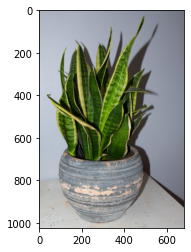

In [ ]:
# Example
import matplotlib.image as mpimg

img = mpimg.imread(pick_imgs[0])
imgplot = plt.imshow(img)
plt.imshow(img)


In [ ]:
from PIL import ImageOps, Image

In [ ]:
# Plot all the samples

w = 15
h = 15

cw = 680
ch = 680

fig = plt.figure(figsize=(12, 15), dpi=200)
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    if i != 21:
        img = Image.open(pick_imgs[i-1][1])
        # Crop the image to square shape
        width, height = img.size
        wdif, hdif = (width - cw) // 2, (height - ch) // 2
        border = wdif, hdif, wdif, hdif  # left, top, right, bottom
        cropped_img = ImageOps.crop(img, border)
        
        fig.add_subplot(rows, columns, i)
        plt.title(pick_imgs[i-1][0], fontsize=15, color='white')
        plt.axis('off')
        plt.imshow(cropped_img)
plt.show()